In [1]:
import numpy as np
from math import exp  

def sigmoid(alpha, z):
    return 1/(1+exp(-alpha*(z)))

import matplotlib.pyplot as plt 

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

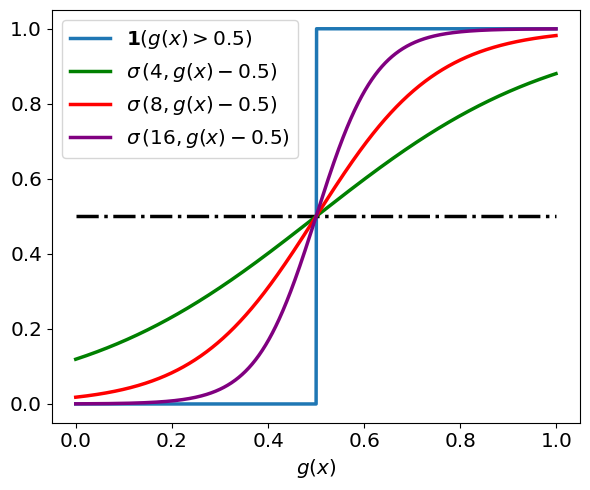

In [3]:
import matplotlib.pyplot as plt 


fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,5))

x = np.arange(0,1,0.001)
z = np.zeros(len(x))
z[x>0.5] = 1 

ax.plot(x, z,label="$\mathbf{1}(g(x)>0.5)$", linewidth=2.5)

ax.hlines(0.5,xmin=x.min(),xmax=x.max(),color='black', linestyles='-.' ,linewidth=2.5)

alpha = 4
z2 = [sigmoid(alpha, x_-0.5) for x_ in x ]
ax.plot(x,z2,color='green', label=f"$\sigma\,({alpha}, g(x)-0.5)$", linewidth=2.5)

alpha = 8
z2 = [sigmoid(alpha, x_-0.5) for x_ in x ]
ax.plot(x,z2,color='red', label=f"$\sigma\,({alpha},g(x)-0.5)$" , linewidth=2.5)

alpha = 16
z2 = [sigmoid(alpha, x_-0.5) for x_ in x ]
ax.plot(x,z2,color='purple', label=f"$\sigma\,({alpha}, g(x)-0.5)$", linewidth=2.5 )

ax.set_xlabel("$g(x)$")
ax.legend()

plt.tight_layout()

plt.savefig(f'../../plots/sigmoids.pdf',dpi=50,bbox_inches='tight' )

In [3]:

X = np.arange(0,1,0.001)
Y = np.array([0]*len(X))
w_star = 0.5
Y[X>w_star] = 1

w = 0.25

Y_hat = np.array([0]*len(X))
Y_hat[X>w] = 1

def g(w,x):
    #return abs(w-x)
    return (w-x)**2

def err_cov(scores, Y, Y_hat,t,y=1):
    idx = np.arange(0,len(scores),1)
    idx_ = idx[ (Y_hat==y) & (scores>=t)]

    cov = len(idx_)/len(idx) 
    err =  np.sum(Y_hat[idx_]!=Y[idx_])/len(idx_)
    return err, cov 
    
t = 0.125
W = np.arange(0,1,0.0001)
E_ac,C_ac = [], []
v = 2e-3
for w in W:
    scores = np.array([g(w,x) for x in X])
    err,cov = err_cov(scores,Y,Y_hat,t,y=1)
    if(err<0.5+v and err>0.5-v):
        err = 0.5 
    if(cov<0.5+v and cov>0.5-v):
        cov = 0.5 
    E_ac.append(err)
    C_ac.append(cov)

#plt.plot(W,E_ac)
#plt.figure()
#plt.plot(W,C_ac)

In [4]:
X = np.arange(0,1,0.0001)
Y = np.array([0]*len(X))
w_star = 0.5
Y[X>w_star] = 1

w = 0.25

Y_hat = np.array([0]*len(X))
Y_hat[X>w] = 1

def g(w,x):
    #return abs(w-x)
    return (w-x)**2


def surr_err_cov(scores, Y, Y_hat,t,y=1,alpha=1.0):
    idx = np.arange(0,len(scores),1)

    S = np.array([sigmoid(alpha,s-t) for s in scores])
    idx_1 = idx[(Y_hat==y)]

    cov = sum(S[idx_1])/len(idx) 
    
    idx_ = idx[ (Y_hat==y) & (Y_hat!=Y)]
    
    err =  np.sum(S[idx_])/sum(S[idx_1])
    return err, cov 

#t = 0.125
def get_surr_err_cov_alpha(alpha=10.0):
    t = 0.125
    W = np.arange(0,1,0.0001)
    E_sur,C_sur = [], []
    for w in W:
        scores = np.array([g(w,x) for x in X])
        err,cov = surr_err_cov(scores,Y,Y_hat,t,y=1,alpha=alpha)
        if(err<0.5+v and err>0.5-v):
            err = 0.5 
        if(cov<0.5+v and cov>0.5-v):
            cov = 0.5 
        
        E_sur.append(err)
        C_sur.append(cov)
    return E_sur, C_sur 

#E_sur,C_sur = get_surr_err_cov_alpha(alpha=1.0)

#plt.plot(W,E_sur)
#plt.figure()
#plt.plot(W,C_sur)

In [5]:
E_sur_1,C_sur_1 = get_surr_err_cov_alpha(alpha=1.0)


In [6]:
E_sur_10,C_sur_10 = get_surr_err_cov_alpha(alpha=10.0)


In [7]:
E_sur_50,C_sur_50 = get_surr_err_cov_alpha(alpha=50.0)

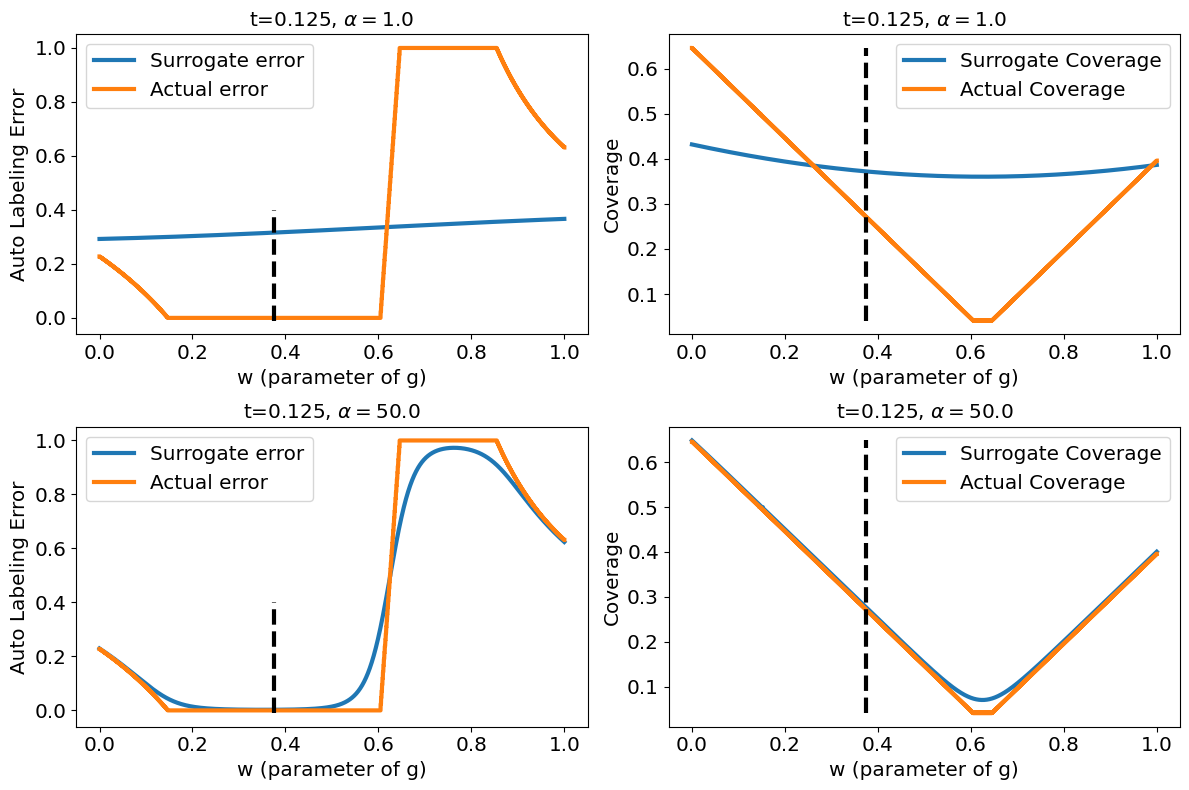

In [8]:


fig, axss = plt.subplots(nrows=2,ncols=2,figsize=(12,8))


def plot(axs,E_sur,C_sur,alpha):
    #E_ac[(E_ac<=0.51) & (E_ac>=0.49)] = 0.5
    l1,=axs[0].plot(W,E_sur,label="Surrogate error",linewidth=3)
    l2,=axs[0].plot(W,E_ac,label="Actual error",linewidth=3)
    axs[0].legend()

    axs[0].set_xlabel("w (parameter of g)")
    axs[0].set_ylabel("Auto Labeling Error")
    axs[0].vlines(0.375, ymin=-0.01,ymax=0.4,linestyle="--",color='black',linewidth=3)


    l3,=axs[1].plot(W,C_sur,label='Surrogate Coverage',linewidth=3)
    l4,=axs[1].plot(W,C_ac,label='Actual Coverage',linewidth=3)
    axs[1].legend()


    axs[1].set_xlabel("w (parameter of g)")
    axs[1].set_ylabel("Coverage")


    axs[1].vlines(0.375, ymin=min(min(C_sur),min(C_ac)),ymax=max(max(C_ac),max(C_sur)),linestyle="--",color='black',linewidth=3)
    #plt.legend([l1,l2,l3,l4])
    axs[0].set_title(f"t={t}, $\\alpha={alpha}$")
    axs[1].set_title(f"t={t}, $\\alpha={alpha}$")

plot(axss[0,:],E_sur_1,C_sur_1,alpha=1.0 )
plot(axss[1,:],E_sur_50,C_sur_50,alpha=50.0 )
plt.tight_layout()

#plt.savefig(f'../../plots/surrogates_alpha_{alpha}.pdf',dpi=100,bbox_inches='tight' )

plt.show()

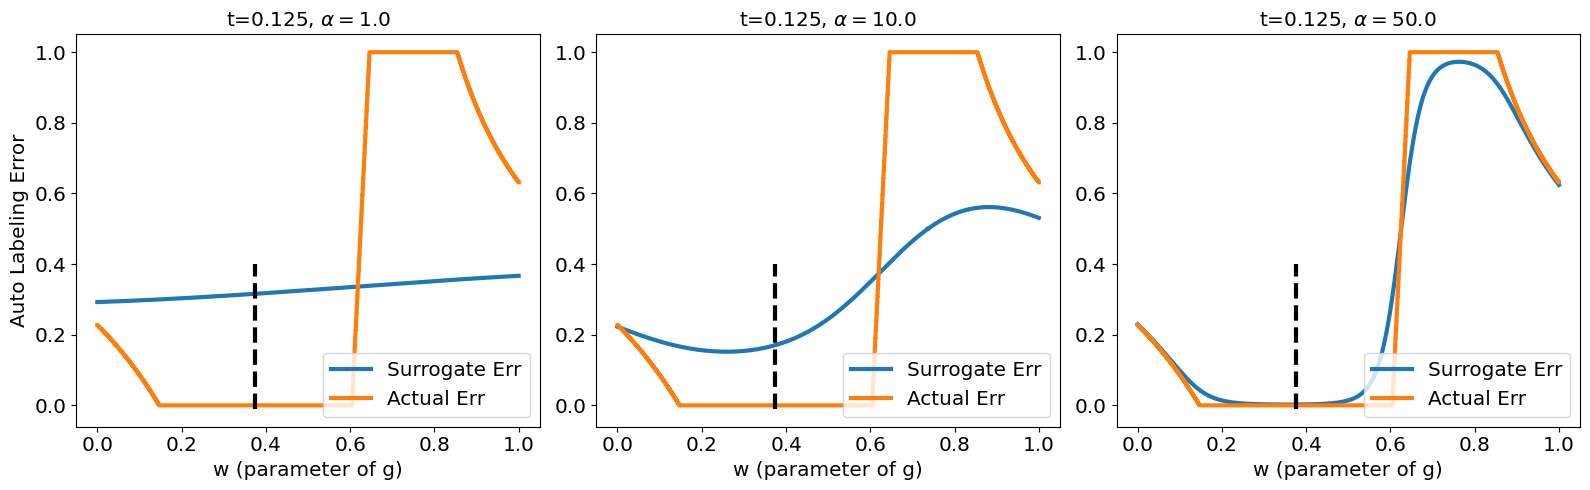

In [9]:


fig, axss = plt.subplots(nrows=1,ncols=3,figsize=(16,5))


def plot_err_only(ax,E_sur,C_sur,alpha,i=0):
    #E_ac[(E_ac<=0.51) & (E_ac>=0.49)] = 0.5
    l1,=ax.plot(W,E_sur,label="Surrogate Err",linewidth=3)
    l2,=ax.plot(W,E_ac,label="Actual Err",linewidth=3)
    ax.legend(loc='lower right')

    ax.set_xlabel("w (parameter of g)")
    if(i==0):
        ax.set_ylabel("Auto Labeling Error")
    ax.vlines(0.375, ymin=-0.01,ymax=0.4,linestyle="--",color='black',linewidth=3)

    
    #plt.legend([l1,l2,l3,l4])
    ax.set_title(f"t={t}, $\\alpha={alpha}$")
    

plot_err_only(axss[0],E_sur_1,C_sur_1,alpha=1.0,i=0 )
plot_err_only(axss[1],E_sur_10,C_sur_10,alpha=10.0,i=1 )
plot_err_only(axss[2],E_sur_50,C_sur_50,alpha=50.0,i=2 )

plt.tight_layout()

plt.savefig(f'../../plots/surrogate_err_all_alpha.pdf',dpi=60,bbox_inches='tight' )

plt.show()

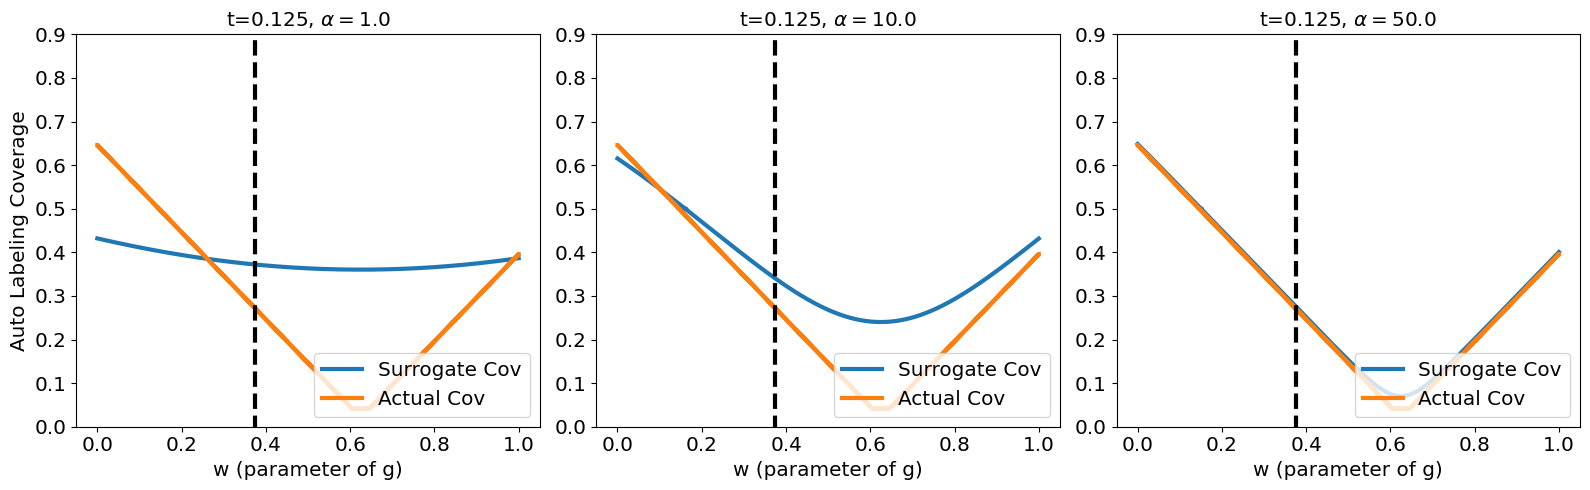

In [11]:


fig, axss = plt.subplots(nrows=1,ncols=3,figsize=(16,5))


def plot_cov_only(ax,E_sur,C_sur,alpha,i=0):
    #E_ac[(E_ac<=0.51) & (E_ac>=0.49)] = 0.5
    l1,=ax.plot(W,C_sur,label="Surrogate Cov",linewidth=3)
    l2,=ax.plot(W,C_ac,label="Actual Cov",linewidth=3)
    ax.legend(loc='lower right')

    ax.set_xlabel("w (parameter of g)")
    if(i==0):
        ax.set_ylabel("Auto Labeling Coverage")
    ax.vlines(0.375, ymin=-0.01,ymax=0.9,linestyle="--",color='black',linewidth=3)
    ax.set_ylim((0.,0.9))
    
    #plt.legend([l1,l2,l3,l4])
    ax.set_title(f"t={t}, $\\alpha={alpha}$")
    

plot_cov_only(axss[0],E_sur_1,C_sur_1,alpha=1.0,i=0 )
plot_cov_only(axss[1],E_sur_10,C_sur_10,alpha=10.0,i=1 )
plot_cov_only(axss[2],E_sur_50,C_sur_50,alpha=50.0,i=2 )

plt.tight_layout()

plt.savefig(f'../../plots/surrogate_cov_all_alpha.pdf',dpi=60,bbox_inches='tight' )

plt.show()

NameError: name 'E_sur' is not defined

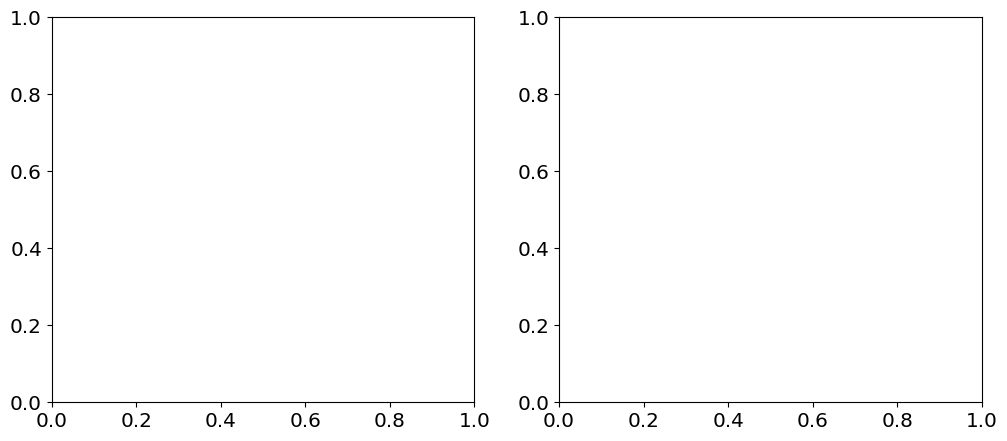

In [12]:


fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
l1,=axs[0].plot(W,E_sur,label="Surrogate error",linewidth=3)

#E_ac[(E_ac<=0.51) & (E_ac>=0.49)] = 0.5

l2,=axs[0].plot(W,E_ac,label="Actual error",linewidth=3)
axs[0].legend()

axs[0].set_xlabel("w (parameter of g)")
axs[0].set_ylabel("Auto Labeling Error")
axs[0].vlines(0.375, ymin=-0.01,ymax=0.4,linestyle="--",color='black',linewidth=3)


l3,=axs[1].plot(W,C_sur,label='Surrogate Coverage',linewidth=3)
l4,=axs[1].plot(W,C_ac,label='Actual Coverage',linewidth=3)
axs[1].legend()


axs[1].set_xlabel("w (parameter of g)")
axs[1].set_ylabel("Coverage")


axs[1].vlines(0.375, ymin=min(min(C_sur),min(C_ac)),ymax=max(max(C_ac),max(C_sur)),linestyle="--",color='black',linewidth=3)
#plt.legend([l1,l2,l3,l4])
axs[0].set_title(f"t={t}, $\\alpha={alpha}$")
axs[1].set_title(f"t={t}, $\\alpha={alpha}$")

plt.tight_layout()

plt.savefig(f'../../plots/surrogates_alpha_{alpha}.pdf',dpi=100,bbox_inches='tight' )

plt.show()

In [14]:
W = np.arange(0,0.5,0.01)
T = np.arange(0,0.5,0.01)
ww, tt = np.meshgrid(W, T)
ww,tt

(array([[0.  , 0.01, 0.02, ..., 0.47, 0.48, 0.49],
        [0.  , 0.01, 0.02, ..., 0.47, 0.48, 0.49],
        [0.  , 0.01, 0.02, ..., 0.47, 0.48, 0.49],
        ...,
        [0.  , 0.01, 0.02, ..., 0.47, 0.48, 0.49],
        [0.  , 0.01, 0.02, ..., 0.47, 0.48, 0.49],
        [0.  , 0.01, 0.02, ..., 0.47, 0.48, 0.49]]),
 array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
        ...,
        [0.47, 0.47, 0.47, ..., 0.47, 0.47, 0.47],
        [0.48, 0.48, 0.48, ..., 0.48, 0.48, 0.48],
        [0.49, 0.49, 0.49, ..., 0.49, 0.49, 0.49]]))

In [15]:
X = np.arange(0,1,0.001)
Y = np.array([0]*len(X))
w_star = 0.5
Y[X>w_star] = 1

w_hat = 0.25

Y_hat = np.array([0]*len(X))
Y_hat[X>w_hat] = 1

def g(w,x):
    return abs(w-x)

def surr_err_cov(scores, Y, Y_hat,t,alpha=5.0,y=1):
    idx = np.arange(0,len(scores),1)

    S = np.array([sigmoid(alpha,s-t) for s in scores])
    idx_1 = idx[Y_hat==y]
    cov = sum(S[idx_1])/len(idx) 
    idx_ = idx[ (Y_hat==y) & (Y_hat!=Y)]
    #idx_ = idx[Y_hat!=Y]
    
    err =  np.sum(S[idx_])/sum(S)
    return err, cov 

t = 0
#W = np.arange(0,1,0.01)
#T = np.arange(0,1,0.01)

E,C = np.zeros(ww.shape),np.zeros(ww.shape)

for i in range(len(ww)):
    for j in range(len(tt)):
        w = ww[i][j]
        t = tt[i][j] 
        
        scores = np.array([g(w,x) for x in X])
        err,cov = surr_err_cov(scores,Y,Y_hat,t,y=1)
        E[i][j] = err
        C[i][j] = cov
        print(w,t,err, cov) 



0.0 0.0 0.24982467616358314 0.7000718805666512
0.01 0.0 0.24950173220896565 0.6978743776078756
0.02 0.0 0.2490762276976689 0.6955915494558276
0.03 0.0 0.2485456918980491 0.6932211928067962
0.04 0.0 0.24790782471508513 0.6907611347419776
0.05 0.0 0.24716051232156355 0.6882092403238331
0.06 0.0 0.24630184246725687 0.6855634204507526
0.07 0.0 0.2453301193521621 0.6828216399335028
0.08 0.0 0.24424387794864422 0.6799819257523527
0.09 0.0 0.24304189765694448 0.6770423754493906
0.1 0.0 0.24172321517898523 0.6740011656064681
0.11 0.0 0.24028713649675615 0.6708565603554811
0.12 0.0 0.23873324784383387 0.6676069198644776
0.13 0.0 0.23706142556179338 0.664250708740403
0.14 0.0 0.2352718447374516 0.6607865042872879
0.15 0.0 0.23336498652207713 0.6572130045574014
0.16 0.0 0.23134164403993324 0.6535290361324108
0.17 0.0 0.2292029268008256 0.6497335615719695
0.18 0.0 0.22695026353972336 0.6458256864684198
0.19 0.0 0.2245854034160215 0.6418046660484803
0.2 0.0 0.22211041551560792 0.6376699112659006
0.

In [16]:
X = np.arange(0,1,0.001)
Y = np.array([0]*len(X))
w_star = 0.5
Y[X>w_star] = 1

w_hat = 0.25

Y_hat = np.array([0]*len(X))
Y_hat[X>w_hat] = 1

def g(w,x):
    return abs(w-x)

def err_cov(scores, Y, Y_hat,t,y=1):
    idx = np.arange(0,len(scores),1)
    idx_ = idx[(scores>=t) & (Y_hat==y)]
    cov = len(idx_)/len(idx) 
    err =  np.sum(Y_hat[idx_]!=Y[idx_])/len(idx_)

    return err, cov 

E2,C2 = np.zeros(ww.shape),np.zeros(ww.shape)

for i in range(len(ww)):
    for j in range(len(tt)):
        w = ww[i][j]
        t = tt[i][j] 
        
        scores = np.array([g(w,x) for x in X])
        err,cov = err_cov(scores,Y,Y_hat,t,y=1)
        E2[i][j] = err
        C2[i][j] = cov
        print(w,t,err, cov) 



0.0 0.0 0.33377837116154874 0.749
0.01 0.0 0.33377837116154874 0.749
0.02 0.0 0.33377837116154874 0.749
0.03 0.0 0.33377837116154874 0.749
0.04 0.0 0.33377837116154874 0.749
0.05 0.0 0.33377837116154874 0.749
0.06 0.0 0.33377837116154874 0.749
0.07 0.0 0.33377837116154874 0.749
0.08 0.0 0.33377837116154874 0.749
0.09 0.0 0.33377837116154874 0.749
0.1 0.0 0.33377837116154874 0.749
0.11 0.0 0.33377837116154874 0.749
0.12 0.0 0.33377837116154874 0.749
0.13 0.0 0.33377837116154874 0.749
0.14 0.0 0.33377837116154874 0.749
0.15 0.0 0.33377837116154874 0.749
0.16 0.0 0.33377837116154874 0.749
0.17 0.0 0.33377837116154874 0.749
0.18 0.0 0.33377837116154874 0.749
0.19 0.0 0.33377837116154874 0.749
0.2 0.0 0.33377837116154874 0.749
0.21 0.0 0.33377837116154874 0.749
0.22 0.0 0.33377837116154874 0.749
0.23 0.0 0.33377837116154874 0.749
0.24 0.0 0.33377837116154874 0.749
0.25 0.0 0.33377837116154874 0.749
0.26 0.0 0.33377837116154874 0.749
0.27 0.0 0.33377837116154874 0.749
0.28 0.0 0.333778371161

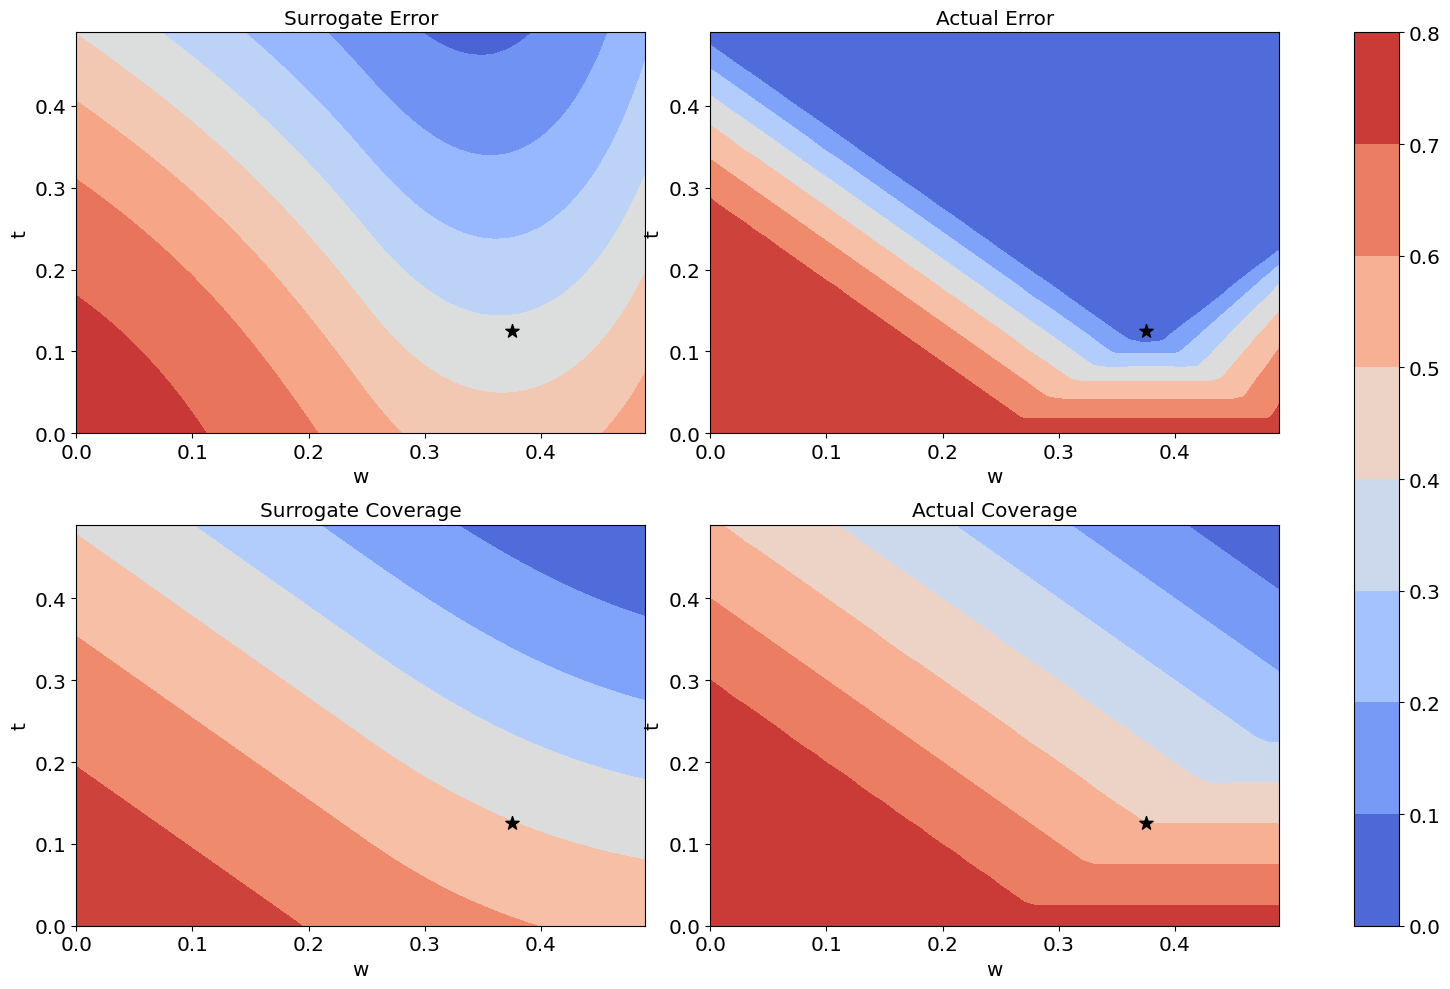

In [22]:



import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib

#font = {'family' : 'normal',
##        'weight' : 'bold',
#       'size'   : 14}

#matplotlib.rc('font', **font)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

#ax = plt.figure().add_subplot(projection='2d')
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(16,10))

#X, Y, Z = axes3d.get_test_data(0.05)
X = ww 
Y = tt 
Z = E 

# Plot the 3D surface
#ax.plot_surface(X, Y, Z, alpha=0.9,cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.plot_surface(X, Y, E2, alpha=0.9, linewidth=0, antialiased=False)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
#cmap = 'YlGnBu'
#cmap = 'Blues'
cmap = 'coolwarm'

cs = axs[0][0].contourf(X, Y, E,  cmap=cmap)
axs[0][0].scatter([0.375],[0.125], marker='*', color='black',s=100)
axs[0][0].set_xlabel('w')
axs[0][0].set_ylabel('t')
axs[0][0].set_title('Surrogate Error')

cs = axs[0][1].contourf(X, Y, E2,  cmap=cmap)
axs[0][1].scatter([0.375],[0.125], marker='*', color='black', s=100)

axs[0][1].set_xlabel('w')
axs[0][1].set_ylabel('t')
axs[0][1].set_title('Actual Error')

cs = axs[1][0].contourf(X, Y, C,  cmap=cmap)
axs[1][0].scatter([0.375],[0.125], marker='*', color='black', s=100)
axs[1][0].set_xlabel('w')
axs[1][0].set_ylabel('t')
axs[1][0].set_title('Surrogate Coverage')

cs = axs[1][1].contourf(X, Y, C2,  cmap=cmap)
axs[1][1].scatter([0.375],[0.125], marker='*', color='black',s=100)
axs[1][1].set_xlabel('w')
axs[1][1].set_ylabel('t')
axs[1][1].set_title('Actual Coverage')
#ax.contour(X, Y, Z, zdir='x', offset=0, cmap='coolwarm')
#ax.contour(X, Y, Z, zdir='y', offset=0, cmap='coolwarm')

#ax.set(xlim=(0, 0.5), ylim=(0, 0.5), zlim=(0, 0.25),
#       xlabel='X', ylabel='Y', zlabel='Z')

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(cs, cax=cbar_ax)

plt.tight_layout()
plt.colorbar(cs, ax=axs)
plt.savefig('../../plots/contours.pdf',dpi=100,bbox_inches='tight' )

plt.show()


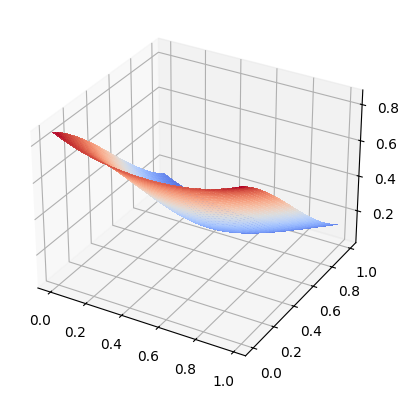

In [70]:



import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

ax = plt.figure().add_subplot(projection='3d')

#X, Y, Z = axes3d.get_test_data(0.05)
X = ww 
Y = tt 
Z = C

# Plot the 3D surface
ax.plot_surface(X, Y, Z, alpha=0.9,cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
#ax.contour(X, Y, Z, zdir='z', offset=0, cmap='coolwarm')
#ax.contour(X, Y, Z, zdir='x', offset=0, cmap='coolwarm')
#ax.contour(X, Y, Z, zdir='y', offset=0, cmap='coolwarm')

#ax.set(xlim=(0, 1), ylim=(0, 1), zlim=(0, 1),
#       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()


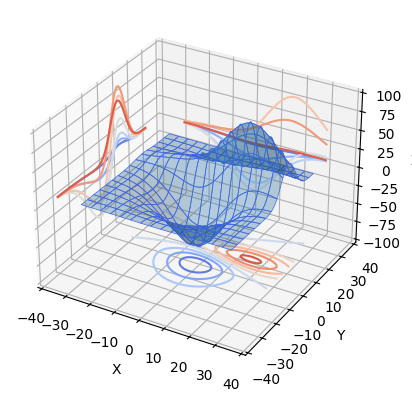

In [24]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()